<center> <h5>Wintersemester 2024/25</h5> </center>
<center> <h1>Medizinische Bildanalyse</h1> </center>
<center> <h3>Aufgabenblatt 11</h3> </center>
<center> <h5>13. Januar 2025</h5> </center>
<center> <h5>
    Prof. Dr. Thomas Schultz, 
    <a href = "mailto: jlen@uni-bonn.de">Jonathan Lennartz</a>
</h5> </center>
<center> <h5>Abgabefrist: <b>20.01.2025, 10:00 Uhr, via eCampus</b></h5> </center>
</br>


### Aufgabe 1 (Bildregistrierung, 25 Punkte)
&nbsp;
<table><tr>
<td> <img src="axial.png" alt="" style="width: 100%;"/> </td>
<td> <img src="axial_transformed.png" alt="Ausgerichtete Formen" style="width: 100%;"/> </td>
</tr></table>
<center>Abbildung: originales und rotiertes Bild.</center>

Die Abbildung zeigt eine 2D-Schicht von einem Hirn-MRT-Scan (links) und eine verschobene, rotierte Kopie (rechts). Wir stellen euch beide Bilder zur Verfügung mit dem Ziel, eine vollständige Registrierung zu implementieren.  
a) Schreibt eine Funktion, die ein Bild beliebig rotieren und verschieben kann. Übergebt dabei die nötigen Parameter als Funktionsargumente. (5P)  
_Tipp:_ Nutzt gern einschlägige Funktionen aus `scipy.ndimage`.

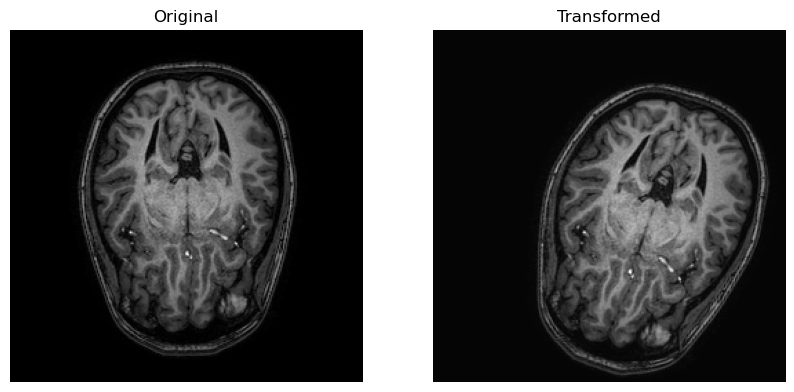

In [11]:
# Lösung 
# Lösung
import numpy as np
import scipy as sp
import skimage as ski
import matplotlib.pyplot as plt


def rotate_and_translate_image(image, angle, tx, ty):
    return sp.ndimage.rotate(sp.ndimage.shift(image, (ty, tx)), angle, reshape=False)


img = ski.io.imread('axial.png', as_gray=True)/255.0
transformed = rotate_and_translate_image(img, 340, 30, 5)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(transformed, cmap='gray')
ax[1].set_title('Transformed')
ax[1].axis('off')
plt.show()

&nbsp;  
b) Implementiert eine Funktion zur Evaluierung der L2-Kostenfunktion für ein gegebenes Bildpaar. Testet eure Funktion, indem ihr die Kosten zwischen dem Bild ```axial.png``` und zunehmenden Verschiebungen und Drehungen als Kurvendiagramm visualisiert. (5P)

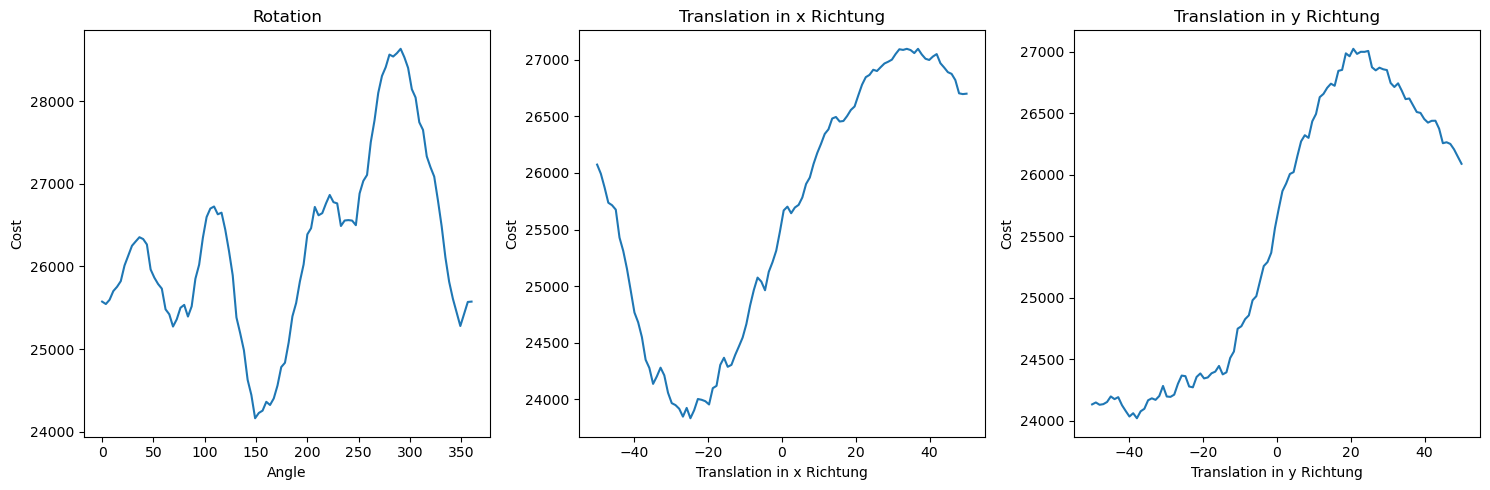

In [4]:
# Lösung 
# Lösung
def l2_norm(image1, image2):
    return np.linalg.norm(image1 - image2, ord=2)


# Für verschiedene Winkel
angles = np.linspace(0, 360, 100)
costs = [l2_norm(img, rotate_and_translate_image(
    transformed, angle, 0, 0)) for angle in angles]

# Für verschiedene Translationen in x Richtung
txs = np.linspace(-50, 50, 100)
costs_tx = [l2_norm(img, rotate_and_translate_image(
    transformed, 0, tx, 0)) for tx in txs]

# Für verschiedene Translationen in y Richtung
tys = np.linspace(-50, 50, 100)
costs_ty = [l2_norm(img, rotate_and_translate_image(
    transformed, 0, 0, ty)) for ty in tys]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(angles, costs)
ax[0].set_xlabel('Angle')
ax[0].set_ylabel('Cost')
ax[0].set_title('Rotation')
ax[1].plot(txs, costs_tx)
ax[1].set_xlabel('Translation in x Richtung')
ax[1].set_ylabel('Cost')
ax[1].set_title('Translation in x Richtung')
ax[2].plot(tys, costs_ty)
ax[2].set_xlabel('Translation in y Richtung')
ax[2].set_ylabel('Cost')
ax[2].set_title('Translation in y Richtung')
plt.tight_layout()
plt.show()

&nbsp;  
c) Implementiert eine Optimierungsroutine auf Basis der Suche mit dem goldenen Schnitt und nutzt sie dazu, die beiden Bilder```axial.png``` und ```axial_transformed.png``` richtig auszurichten. Nutzt dazu die Funktionen aus Aufgabenteil a) und b). Ihr könnt euch an folgenden Schritten orientieren:
* Schreibt eine Funktion, die aus einem Intervall, einem inneren Punkt und einer Kostenfunktion mittels des goldenen-Schnitt-Verfahrens ein kleineres Intervall berechnet, das mindestens ein lokales Minimum enthält. Die Bewertungsfunktion sollte nur innerhalb des Intervalls ausgewertet werden. (6P)  
_Tipp: Die Lambda-Notation in Python ist eine elegante Möglichkeit, bestimmte Parameter einer Funktion auf feste Werte zu setzen, so dass nur der für die Registrierung aktuell relevante verbleibt._
* Schreibt eine Funktion, die für ein initiales Suchintervall zunächst einen gültigen inneren Punkt sucht um sicherzustellen, dass mindestens ein Minimum enthalten ist. Ist dies gelungen, sollte das Intervall mit der Funktion aus dem vorherigen Schritt so lange verkleinert werden, bis seine Breite einen bestimmten Wert (z.B. 0.5) unterschreitet. (6P)  
_Hinweis: Dieses Vorgehen zum Finden eines initialen Intervalls und inneren Punkts unterscheidet sich von der Strategie aus der Vorlesung, ist in unserem Fall aber bequemer._
* Wendet diese Funktion nun abwechselnd auf Verschiebungen und Rotationen an, bis das Verfahren konvergiert. Danach sollten beide Bilder visuell kaum zu unterscheiden sein. (3P)

In [ ]:
# Lösung


### Aufgabe 2 (Affine Transformation aus Korrespondenzen, 15 Punkte)
In dieser Aufgabe betrachten wir die Berechnung einer affinen Transformation aus gegebenen Korrespondenzen. Konkret wählt ihr einige Landmarken in einem Bild aus, die in einem zweiten Bild leicht wiederzufinden sind. Anschließend schätzt ihr eine affine Transformation, die eben diese Punkte so nah wie möglich zueinander bringt. Da die Transformation auf das gesamte Bild angewandt wird, solltet ihr eine vollständige Registrierung erreichen.

&nbsp;  
a) Wie viele korrespondierende Punkte benötigt man mindestens, um eine eindeutige affine Transformation zu bestimmten, die 2D-Bilder registriert? Müssen diese Punkte bestimmte Anforderungen erfüllen? (4P)

_Lösung:_


b) Findet eine geeignete Anzahl korrespondierender Punkte in ```T1.png``` und ```b0_trans.png``` und bestimmt die resultierende Transformationsmatrix mittels eines linearen Gleichungssystems. Verifiziert eure Lösung, indem ihr eure Transformation auf ```b0_trans.png``` anwendet und das Ergebnis visualisiert. (10P)
&nbsp;  

In [ ]:
# Lösung


&nbsp;  
c) In der Praxis nutzt man häufig mehr als die Mindestanzahl an nötigen Korrespondenzpunkten. Wie würdet ihr in diesem Fall eine optimale Transformationsmatrix berechnen? (1P)

_Lösung:_  


### Aufgabe 3 (Grundlagen Neuronaler Netze, 10 Punkte)
a) Gegeben sei ein neuronales Netz zur Klassifikation, das - wie auf Folie 17 in Kapitel 6a - aus einer einzigen Schicht besteht und auf eine Aktivierungsfunktion verzichtet. Kann sich durch eine Skalierung aller Parameter mit einer positiven Konstante $\gamma>0$ die Klasse ändern, die für eine gegebene Eingabe die höchste Bewertung erhält? Begründet eure Antwort kurz. Ändert sich die Antwort, wenn man die bias-Terme von der Skalierung ausnimmt? Ändert sich die Antwort, wenn man nichtlineare Aktivierungsfunktionen einführt und das Netzwerk tiefer macht? (5P)

_Antwort:_

b) Die Analyse von Bildern realistischer Größe ist rein mit vollständig verbundenen Schichten praktisch nicht sinnvoll möglich. Berechnet um den Grund dafür zu verdeutlichen die Zahl der Parameter, die ein neuronales Netzwerk enthält, das ein Regressionsproblem auf 200x200 Pixeln großen RGB-Bildern lösen soll. Hierbei sollen die ersten drei vollständig verbundenen verborgenen Schichten jeweils um den Faktor 4 weniger Ausgaben erzeugen als sie Eingaben hatten. Eine vierte vollständig verbundene Schicht soll die verbliebenen Werte auf eine einzige Ausgabe abbilden. Wie viele Parameter haben die einzelnen Schichten und das Netzwerk insgesamt? (5P)

_Antwort:_